In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Raw/Acropora_metaproteome.csv')
df

,Protein ID,Intensity 122023-rutgers-trial16-3007,Intensity 122023-rutgers-trial17-638,Intensity 122023-rutgers-trial18-5070,Intensity 242023-rutgers-28-639,Intensity 242023-rutgers-29-13,Intensity 242023-rutgers-30-5400,Intensity 312023-rutgers-43-475,Intensity 312023-rutgers-44-473,Intensity 312023-rutgers-45-3132,Intensity 122023-rutgers-trial7-5013,Intensity 122023-rutgers-trial8-5016,Intensity 122023-rutgers-trial9-89,Intensity 242023-rutgers-22-5015,Intensity 242023-rutgers-23-5018,Intensity 242023-rutgers-24-2192,Intensity 312023-rutgers-37-2294,Intensity 312023-rutgers-41-116,Intensity 312023-rutgers-47-113
0,Acropora_hyacinthus_SLJPv1___s0142.g47.t1,3.967503e+07,8.103605e+06,3.354498e+07,2.953198e+07,2.865401e+07,3.921502e+07,5.603601e+07,4.264397e+07,5.811703e+07,8.337703e+06,6.624499e+06,1.319401e+07,4.852198e+06,4.745602e+06,1.143000e+07,8.195595e+06,4.252799e+06,2.843202e+06
1,Acropora_hyacinthus_SLJPv1___s0158.g27.t1,6.461996e+08,5.309698e+08,1.131200e+09,3.923898e+08,9.137398e+08,5.793697e+08,3.053600e+08,4.498198e+08,7.269297e+08,2.568101e+08,2.298700e+08,2.602901e+08,6.711898e+07,2.945400e+08,1.098700e+08,9.954502e+07,2.649600e+08,1.824199e+08
2,Acropora_hyacinthus_SLJPv1___s0072.g39.t1,3.589199e+07,1.211700e+07,2.152100e+07,1.429101e+07,3.903801e+07,3.428800e+07,1.181100e+07,1.584301e+07,3.214399e+07,1.768811e+06,5.721477e+06,6.847662e+05,1.196470e+06,4.595074e+06,5.722399e+06,4.480802e+06,4.996556e+05,8.691905e+06
3,Cladocopium_goreaui_v3___evm.model.scf71800003...,2.217601e+07,1.249400e+07,4.506097e+06,1.608200e+07,2.740401e+07,1.984300e+07,3.431299e+06,5.869197e+06,7.421799e+06,6.378501e+06,2.860950e+06,2.194299e+06,9.351566e+05,2.296911e+06,3.972499e+06,1.265059e+06,2.426186e+06,2.863731e+06
4,Cladocopium_goreaui_v3___evm.model.scf71800003...,6.908998e+06,1.480399e+07,1.430201e+07,6.782000e+06,4.015900e+07,1.130000e+07,4.865399e+06,1.036101e+07,1.433699e+07,2.272773e+06,1.501339e+06,3.393202e+06,1.889400e+06,8.036698e+06,1.143556e+06,6.497943e+06,6.561497e+06,2.622799e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,Acropora_hyacinthus_SLJPv1___s0016.g82.t1;Acro...,6.180098e+07,1.357600e+06,2.741601e+08,2.047499e+08,1.525799e+08,1.402099e+08,1.049300e+08,1.763700e+08,1.261500e+08,2.462199e+08,1.935501e+08,3.818499e+07,3.019098e+07,1.566601e+08,3.600400e+07,7.328304e+07,1.005100e+08,1.016500e+08
2867,Acropora_hyacinthus_SLJPv1___s0006.g34.t1,1.386200e+08,1.994599e+07,2.684401e+08,4.826899e+08,4.338300e+08,3.516201e+08,2.990002e+08,1.505700e+08,1.956499e+08,4.183001e+08,2.505001e+08,1.076899e+08,8.398095e+07,3.534799e+08,1.293001e+08,1.912200e+08,2.182301e+08,2.647201e+08
2868,Acropora_hyacinthus_SLJPv1___s0018.g158.t1,4.864800e+07,8.180040e+05,1.079200e+08,2.730398e+07,9.572599e+07,7.222196e+07,2.146036e+06,3.283200e+07,8.312201e+07,6.468800e+07,3.892401e+07,4.013098e+07,5.445088e+05,3.340602e+07,1.666800e+07,2.426901e+07,7.857898e+07,8.225000e+07
2869,Acropora_hyacinthus_SLJPv1___s0142.g7.t1,2.933501e+07,1.950031e+05,5.586197e+07,6.303096e+07,7.968499e+07,4.343798e+07,3.110399e+07,4.325202e+07,3.339900e+07,6.415102e+07,5.201703e+07,1.898801e+07,4.899701e+06,4.136197e+07,6.879003e+06,2.000901e+07,3.498299e+07,5.031503e+07


In [20]:
df['Protein ID'] = df['Protein ID'].str.split(';')

# Creating a new DataFrame by duplicating rows for each Protein ID for all columns
new_data = {'Protein ID': df['Protein ID'].explode()}
for col in df.columns[1:]:  # Exclude the first column (Protein IDs)
    new_data[col] = df[col].repeat(df['Protein ID'].str.len())

# Creating the new DataFrame
new_df = pd.DataFrame(new_data)

# Resetting index
new_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame
new_df

,Protein ID,Intensity 122023-rutgers-trial16-3007,Intensity 122023-rutgers-trial17-638,Intensity 122023-rutgers-trial18-5070,Intensity 242023-rutgers-28-639,Intensity 242023-rutgers-29-13,Intensity 242023-rutgers-30-5400,Intensity 312023-rutgers-43-475,Intensity 312023-rutgers-44-473,Intensity 312023-rutgers-45-3132,Intensity 122023-rutgers-trial7-5013,Intensity 122023-rutgers-trial8-5016,Intensity 122023-rutgers-trial9-89,Intensity 242023-rutgers-22-5015,Intensity 242023-rutgers-23-5018,Intensity 242023-rutgers-24-2192,Intensity 312023-rutgers-37-2294,Intensity 312023-rutgers-41-116,Intensity 312023-rutgers-47-113
0,Acropora_hyacinthus_SLJPv1___s0142.g47.t1,3.967503e+07,8.103605e+06,3.354498e+07,2.953198e+07,2.865401e+07,3.921502e+07,5.603601e+07,4.264397e+07,5.811703e+07,8.337703e+06,6.624499e+06,1.319401e+07,4.852198e+06,4.745602e+06,1.143000e+07,8.195595e+06,4.252799e+06,2.843202e+06
1,Acropora_hyacinthus_SLJPv1___s0158.g27.t1,6.461996e+08,5.309698e+08,1.131200e+09,3.923898e+08,9.137398e+08,5.793697e+08,3.053600e+08,4.498198e+08,7.269297e+08,2.568101e+08,2.298700e+08,2.602901e+08,6.711898e+07,2.945400e+08,1.098700e+08,9.954502e+07,2.649600e+08,1.824199e+08
2,Acropora_hyacinthus_SLJPv1___s0072.g39.t1,3.589199e+07,1.211700e+07,2.152100e+07,1.429101e+07,3.903801e+07,3.428800e+07,1.181100e+07,1.584301e+07,3.214399e+07,1.768811e+06,5.721477e+06,6.847662e+05,1.196470e+06,4.595074e+06,5.722399e+06,4.480802e+06,4.996556e+05,8.691905e+06
3,Cladocopium_goreaui_v3___evm.model.scf71800003...,2.217601e+07,1.249400e+07,4.506097e+06,1.608200e+07,2.740401e+07,1.984300e+07,3.431299e+06,5.869197e+06,7.421799e+06,6.378501e+06,2.860950e+06,2.194299e+06,9.351566e+05,2.296911e+06,3.972499e+06,1.265059e+06,2.426186e+06,2.863731e+06
4,Cladocopium_goreaui_v3___evm.model.scf71800003...,6.908998e+06,1.480399e+07,1.430201e+07,6.782000e+06,4.015900e+07,1.130000e+07,4.865399e+06,1.036101e+07,1.433699e+07,2.272773e+06,1.501339e+06,3.393202e+06,1.889400e+06,8.036698e+06,1.143556e+06,6.497943e+06,6.561497e+06,2.622799e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,Acropora_hyacinthus_SLJPv1___s0016.g81.t1,6.180098e+07,1.357600e+06,2.741601e+08,2.047499e+08,1.525799e+08,1.402099e+08,1.049300e+08,1.763700e+08,1.261500e+08,2.462199e+08,1.935501e+08,3.818499e+07,3.019098e+07,1.566601e+08,3.600400e+07,7.328304e+07,1.005100e+08,1.016500e+08
3309,Acropora_hyacinthus_SLJPv1___s0006.g34.t1,1.386200e+08,1.994599e+07,2.684401e+08,4.826899e+08,4.338300e+08,3.516201e+08,2.990002e+08,1.505700e+08,1.956499e+08,4.183001e+08,2.505001e+08,1.076899e+08,8.398095e+07,3.534799e+08,1.293001e+08,1.912200e+08,2.182301e+08,2.647201e+08
3310,Acropora_hyacinthus_SLJPv1___s0018.g158.t1,4.864800e+07,8.180040e+05,1.079200e+08,2.730398e+07,9.572599e+07,7.222196e+07,2.146036e+06,3.283200e+07,8.312201e+07,6.468800e+07,3.892401e+07,4.013098e+07,5.445088e+05,3.340602e+07,1.666800e+07,2.426901e+07,7.857898e+07,8.225000e+07
3311,Acropora_hyacinthus_SLJPv1___s0142.g7.t1,2.933501e+07,1.950031e+05,5.586197e+07,6.303096e+07,7.968499e+07,4.343798e+07,3.110399e+07,4.325202e+07,3.339900e+07,6.415102e+07,5.201703e+07,1.898801e+07,4.899701e+06,4.136197e+07,6.879003e+06,2.000901e+07,3.498299e+07,5.031503e+07


In [17]:
subset_df = new_df[new_df['Protein IDs'].str.contains('Clad')]

#subset_df.to_csv("Acropora_endosymbio.csv")

# Processing

In [ ]:
# normalization for endosymbionts 
Acr = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Acropora_endosymbiont.csv')
TP1_col = ['Acr_5015', 'Acr_5018', 'Acr_2192']
TP1_multiplier = 0.942
Acr[TP1_col] *= TP1_multiplier

# do the same for TP2
TP2_col = ['Acr_2294', 'Acr_116', 'Acr_113']
TP2_multiplier = 0.946
Acr[TP2_col] *= TP2_multiplier
Acr


# Differential Accumulation

In [ ]:
metadata = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Metadata/Acropora_metadata.csv')
metadata_TP0 = metadata[metadata['Timepoint'] == 'TP0']
metadata_TP1 = metadata[metadata['Timepoint'] == 'TP1']
metadata_TP2 = metadata[metadata['Timepoint'] == 'TP2']
metadata_TP1



metabolites_file = Acr
Sample_ID = metadata_TP0

# Filter Sample_ID for "Ambient" and "Heat" treatments
T1_samples = Sample_ID[Sample_ID['Treatment'] == 'Ambient']
T2_samples = Sample_ID[Sample_ID['Treatment'] == 'Hot']

# Extract Sample.ID values for T1 and T2
T1_sample_ids = T1_samples['Sample.ID'].tolist()
T2_sample_ids = T2_samples['Sample.ID'].tolist()

# Filter metabolites_file for T1 and T2 samples
T1_metabolites = metabolites_file[T1_sample_ids]
T2_metabolites = metabolites_file[T2_sample_ids]

# Find metabolites to keep based on row sums
t1 = np.where(T1_metabolites.sum(axis=1) > 0)[0]
t2 = np.where(T2_metabolites.sum(axis=1) > 0)[0]
tokeep = np.union1d(t1, t2)

T1_metabolites = T1_metabolites.iloc[tokeep]
T2_metabolites = T2_metabolites.iloc[tokeep]

# Calculate p-values using t-tests
pval = []
for i in range(len(tokeep)):
    test_stat, p_value = ttest_ind(T1_metabolites.iloc[i], T2_metabolites.iloc[i])
    pval.append(p_value)

# Adjust p-values using Benjamini-Hochberg method
pvalAdj = multipletests(pval, method='fdr_bh')[1]

# Calculate log2 fold change
T1_log2 = np.log2(T1_metabolites)
T1_log2.replace(-np.inf, 0, inplace=True)
control = T1_log2.mean(axis=1)

T2_log2 = np.log2(T2_metabolites)
T2_log2.replace(-np.inf, 0, inplace=True)
test = T2_log2.mean(axis=1)

foldchange = test - control

stats_T1 = pd.DataFrame({'FC': foldchange, 'pval': pval, 'ADJPVALUE': pvalAdj})
stats_T1.rename(columns={'FC': 'FC_TP0', 'pval': 'pval_TP0', 'ADJPVALUE': 'ADJPVALUE_TP0'}, inplace=True)
stats_T1

# Downstream Analysis
1. Identify pathways of interest
2. Make an excel table with those up and down regulated 
3. Last step is to get cracking on plots

In [74]:
Acr = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Acr_complete_symb.csv')
Sty = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Sty_complete_symb.csv')
Por = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Por_complete_symb.csv')
# lets run with Montipora as well 
#Mon = pd.read_csv('/Users/Shrini/Desktop/On-going Papers/Metaproteome_paper_viii 2/Supplemental Tables/Supplemental_Table_1_Mcap_Symbiont.csv')

#### Processing totals

In [81]:
subset_df = Sty[(Sty['FC_TP1'] < -0.5) & (Sty['pval_TP1'] < 0.05)]

print("Number of total proteins detected:", subset_df.shape[0])

Number of total proteins detected: 81


### Prioritize Pathways
1. Amino acid 
2. Carbohydrate metabolism 
3. Carbon fixation 
4. Fatty acid 
5. Oxidative phosphorylation
6. Photosynthesis 


In [87]:
pathway = 'Amino acid'
Sty.dropna(subset=['B-Description'], inplace=True)
protein_pathway = Sty[Sty['B-Description'].str.contains(pathway, case=False)]

# code for TP0 first # down 
tp0_downregulated_FC = protein_pathway[(protein_pathway['FC_TP0'] < -0.5)]
tp0_downregulated_sig = tp0_downregulated_FC[(tp0_downregulated_FC['pval_TP0'] < 0.05)]
# for upregulated 
tp0_up_FC = protein_pathway[(protein_pathway['FC_TP0'] > 0.5)]
tp0_up_sig = tp0_up_FC[(tp0_up_FC['pval_TP0'] < 0.05)]

print("Number of total proteins detected:", protein_pathway.shape[0])

print('#################TP0#################')
print("Number of rows with decreased abundance:", tp0_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp0_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp0_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp0_up_sig.shape[0])

print('####################TP1#####################')
print('')
# For downregulated at tp1
tp1_downregulated_FC = protein_pathway[(protein_pathway['FC_TP1'] < -0.5)]
tp1_downregulated_sig = tp1_downregulated_FC[(tp1_downregulated_FC['pval_TP1'] < 0.05)]

# For upregulated at tp1
tp1_up_FC = protein_pathway[(protein_pathway['FC_TP1'] > 0.5)]
tp1_up_sig = tp1_up_FC[(tp1_up_FC['pval_TP1'] < 0.05)]

print("Number of rows with decreased abundance:", tp1_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp1_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp1_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp1_up_sig.shape[0])


print('##########################TP2####################')
print('')
# For downregulated at tp2
tp2_downregulated_FC = protein_pathway[(protein_pathway['FC_TP2'] < -0.5)]
tp2_downregulated_sig = tp2_downregulated_FC[(tp2_downregulated_FC['pval_TP2'] < 0.05)]

# For upregulated at tp2
tp2_up_FC = protein_pathway[(protein_pathway['FC_TP2'] > 0.5)]
tp2_up_sig = tp2_up_FC[(tp2_up_FC['pval_TP2'] < 0.05)]

print("Number of rows with decreased abundance:", tp2_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp2_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp2_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp2_up_sig.shape[0])
'''

Number of total proteins detected: 22
#################TP0#################
Number of rows with decreased abundance: 7
Number of rows with significant decreased abundance: 0

Number of rows with increased abundance: 8
Number of rows with significant increased abundance: 0
####################TP1#####################

Number of rows with decreased abundance: 11
Number of rows with significant decreased abundance: 4

Number of rows with increased abundance: 0
Number of rows with significant increased abundance: 0


'\nprint(\'##########################TP2####################\')\nprint(\'\')\n# For downregulated at tp2\ntp2_downregulated_FC = protein_pathway[(protein_pathway[\'FC_TP2\'] < -0.5)]\ntp2_downregulated_sig = tp2_downregulated_FC[(tp2_downregulated_FC[\'pval_TP2\'] < 0.05)]\n\n# For upregulated at tp2\ntp2_up_FC = protein_pathway[(protein_pathway[\'FC_TP2\'] > 0.5)]\ntp2_up_sig = tp2_up_FC[(tp2_up_FC[\'pval_TP2\'] < 0.05)]\n\nprint("Number of rows with decreased abundance:", tp2_downregulated_FC.shape[0])\nprint("Number of rows with significant decreased abundance:", tp2_downregulated_sig.shape[0])\nprint("")\nprint("Number of rows with increased abundance:", tp2_up_FC.shape[0])\nprint("Number of rows with significant increased abundance:", tp2_up_sig.shape[0])\n'

## For Montipora

In [102]:
pathway = 'Carbon '
Mon.dropna(subset=['Level_3-Description'], inplace=True)
protein_pathway = Mon[Mon['Level_3-Description'].str.contains(pathway, case=False)]

# code for TP0 first # down 
tp0_downregulated_FC = protein_pathway[(protein_pathway['log2FC_TP1'] < -0.5)]
tp0_downregulated_sig = tp0_downregulated_FC[(tp0_downregulated_FC['pvalue TP1'] < 0.05)]
# for upregulated 
tp0_up_FC = protein_pathway[(protein_pathway['log2FC_TP1'] > 0.5)]
tp0_up_sig = tp0_up_FC[(tp0_up_FC['pvalue TP1'] < 0.05)]

print("Number of total proteins detected:", protein_pathway.shape[0])

print('#################TP1#################')
print("Number of rows with decreased abundance:", tp0_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp0_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp0_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp0_up_sig.shape[0])

print('####################TP3#####################')
print('')
# For downregulated at tp1
tp1_downregulated_FC = protein_pathway[(protein_pathway['log2FC_TP3'] < -0.5)]
tp1_downregulated_sig = tp1_downregulated_FC[(tp1_downregulated_FC['pvalue_TP3'] < 0.05)]

# For upregulated at tp1
tp1_up_FC = protein_pathway[(protein_pathway['log2FC_TP3'] > 0.5)]
tp1_up_sig = tp1_up_FC[(tp1_up_FC['pvalue_TP3'] < 0.05)]

print("Number of rows with decreased abundance:", tp1_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp1_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp1_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp1_up_sig.shape[0])


Number of total proteins detected: 3
#################TP1#################
Number of rows with decreased abundance: 0
Number of rows with significant decreased abundance: 0

Number of rows with increased abundance: 0
Number of rows with significant increased abundance: 0
####################TP3#####################

Number of rows with decreased abundance: 3
Number of rows with significant decreased abundance: 1

Number of rows with increased abundance: 0
Number of rows with significant increased abundance: 0


# Filter out lows

In [110]:
# code for TP0 first # down 
tp0_downregulated_FC = Sty[(Sty['FC_TP0'] < -0.5)]
tp0_downregulated_sig = tp0_downregulated_FC[(tp0_downregulated_FC['pval_TP0'] < 0.05)]
# for upregulated 
tp0_up_FC = Sty[(Sty['FC_TP0'] > 0.5)]
tp0_up_sig = tp0_up_FC[(tp0_up_FC['pval_TP0'] < 0.05)]

print("Number of total proteins detected:", Sty.shape[0])

print('#################TP0#################')
print("Number of rows with decreased abundance:", tp0_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp0_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp0_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp0_up_sig.shape[0])

print('####################TP1#####################')
print('')
# For downregulated at tp1
tp1_downregulated_FC = Sty[(Sty['FC_TP1'] < -0.5)]
tp1_downregulated_sig = tp1_downregulated_FC[(tp1_downregulated_FC['pval_TP1'] < 0.05)]

# For upregulated at tp1
tp1_up_FC = Sty[(Sty['FC_TP1'] > 0.5)]
tp1_up_sig = tp1_up_FC[(tp1_up_FC['pval_TP1'] < 0.05)]

print("Number of rows with decreased abundance:", tp1_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp1_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp1_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp1_up_sig.shape[0])


print('##########################TP2####################')
print('')
'''
# For downregulated at tp2
tp2_downregulated_FC = Sty[(Sty['FC_TP2'] < -0.5)]
tp2_downregulated_sig = tp2_downregulated_FC[(tp2_downregulated_FC['pval_TP2'] < 0.05)]

# For upregulated at tp2
tp2_up_FC = Sty[(Sty['FC_TP2'] > 0.5)]
tp2_up_sig = tp2_up_FC[(tp2_up_FC['pval_TP2'] < 0.05)]

print("Number of rows with decreased abundance:", tp2_downregulated_FC.shape[0])
print("Number of rows with significant decreased abundance:", tp2_downregulated_sig.shape[0])
print("")
print("Number of rows with increased abundance:", tp2_up_FC.shape[0])
print("Number of rows with significant increased abundance:", tp2_up_sig.shape[0])
'''

Number of total proteins detected: 696
#################TP0#################
Number of rows with decreased abundance: 248
Number of rows with significant decreased abundance: 46

Number of rows with increased abundance: 106
Number of rows with significant increased abundance: 6
####################TP1#####################

Number of rows with decreased abundance: 317
Number of rows with significant decreased abundance: 81

Number of rows with increased abundance: 47
Number of rows with significant increased abundance: 5
##########################TP2####################



'\n# For downregulated at tp2\ntp2_downregulated_FC = Sty[(Sty[\'FC_TP2\'] < -0.5)]\ntp2_downregulated_sig = tp2_downregulated_FC[(tp2_downregulated_FC[\'pval_TP2\'] < 0.05)]\n\n# For upregulated at tp2\ntp2_up_FC = Sty[(Sty[\'FC_TP2\'] > 0.5)]\ntp2_up_sig = tp2_up_FC[(tp2_up_FC[\'pval_TP2\'] < 0.05)]\n\nprint("Number of rows with decreased abundance:", tp2_downregulated_FC.shape[0])\nprint("Number of rows with significant decreased abundance:", tp2_downregulated_sig.shape[0])\nprint("")\nprint("Number of rows with increased abundance:", tp2_up_FC.shape[0])\nprint("Number of rows with significant increased abundance:", tp2_up_sig.shape[0])\n'

# Carbon fixation
Acropora
identifiers = [
    'K00026',
    'K00134',
    'K00615',
    'K00855',
    'K00927',
    'K01100',
    'K01595',
    'K01601',
    'K01610',
    'K01624',
    'K01803',
    'K03841'
]

Stylophora
K01623

Porties
K01006

Carbon_fixation_proteins = ['K00026',
    'K00134',
    'K00615',
    'K00855',
    'K00927',
    'K01100',
    'K01595',
    'K01601',
    'K01610',
    'K01624',
    'K01803',
    'K03841',
    'K01623'
    'K01006'
    ]


In [125]:
# extract carbon fixation proteins only 

Carbon_fixation_proteins = ['K00026', 'K00134', 'K00615', 'K00855', 'K00927', 'K01100', 'K01595', 'K01601', 'K01610', 'K01624', 'K01803', 'K03841', 'K01623' 'K01006']


Acr_carbon_fixation = Acr[Acr['KO'].isin(Carbon_fixation_proteins)]
Sty_carbon_fixation = Sty[Sty['KO'].isin(Carbon_fixation_proteins)]
Por_carbon_fixation = Por[Por['KO'].isin(Carbon_fixation_proteins)]

# lets merge the datasets and see which ones are common 
tmp = pd.merge(Acr_carbon_fixation, Sty_carbon_fixation, on='Protein_ID')
carbon_fixation = pd.merge(tmp, Por_carbon_fixation, on='Protein_ID')
carbon_fixation.to_csv('Carbon_fixation_proteins.csv')



In [124]:
columns_to_check = [col for col in carbon_fixation.columns if 'FC_TP1' in col]

# Subset DataFrame based on the condition
subset_df_for_TP1 = carbon_fixation.loc[(carbon_fixation[columns_to_check] < -0.5).all(axis=1)]
subset_df_for_TP1

# check for TP2
columns_to_check = [col for col in carbon_fixation.columns if 'FC_TP2' in col]

# Subset DataFrame based on the condition
subset_df_for_TP2 = carbon_fixation.loc[(carbon_fixation[columns_to_check] < -0.5).all(axis=1)]
subset_df_for_TP2


,Unnamed: 0.1_x,Protein_ID,FC_TP0_x,pval_TP0_x,ADJPVALUE_TP0_x,FC_TP1_x,pval_TP1_x,ADJPVALUE_TP1_x,FC_TP2_x,pval_TP2_x,...,ADJPVALUE_TP2_y,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description
0,10,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.317536,0.432812,0.989,-2.141253,0.081005,0.167348,-2.947988,0.004802,...,0.130194,77190,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr..."
1,21,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.363737,0.428129,0.989,-1.747183,0.012906,0.146404,-2.381645,0.022867,...,0.092979,99386,K00615,9100.0,Metabolism,9101.0,Carbohydrate metabolism,30.0,Pentose phosphate pathway [PATH:ko00030],"E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]"
2,62,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.849846,0.364747,0.989,-3.671177,0.033906,0.159913,-2.128998,0.011735,...,0.130194,62757,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla..."
3,126,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.029538,0.613381,0.989,-1.485765,0.060519,0.163687,-2.299668,0.018415,...,0.226856,84665,K01100,9100.0,Metabolism,9102.0,Energy metabolism,710.0,Carbon fixation in photosynthetic organisms [P...,E3.1.3.37; sedoheptulose-bisphosphatase [EC:3....
4,208,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.167911,0.833640,0.989,-1.414147,0.020566,0.146404,-2.240160,0.017200,...,0.166512,67560,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr..."
5,266,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.317120,0.853561,0.989,-1.941300,0.026588,0.149841,-2.823033,0.019706,...,0.137421,65276,K01595,9100.0,Metabolism,9101.0,Carbohydrate metabolism,620.0,Pyruvate metabolism [PATH:ko00620],ppc; phosphoenolpyruvate carboxylase [EC:4.1.1...
6,270,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.006297,0.927360,0.989,-1.237333,0.073110,0.166038,-2.025504,0.018192,...,0.151125,68385,K01601,9100.0,Metabolism,9101.0,Carbohydrate metabolism,630.0,Glyoxylate and dicarboxylate metabolism [PATH:...,rbcL; ribulose-bisphosphate carboxylase large ...
7,281,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.070489,0.658012,0.989,-2.168786,0.013741,0.146404,-1.888265,0.026198,...,0.138347,81583,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"
8,286,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.227681,0.802958,0.989,-2.007448,0.097231,0.184212,-1.677843,0.057757,...,0.322987,100969,K01803,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"TPI, tpiA; triosephosphate isomerase (TIM) [EC..."
9,342,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.019848,0.663387,0.989,-1.612782,0.045394,0.160288,-1.620600,0.100329,...,0.135210,64559,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"


##### Scatter plot

In [59]:
Carbon_fixation_proteins = ['K00026', 'K00134', 'K00615', 'K00855', 'K00927', 'K01100', 'K01595', 'K01601', 'K01610', 'K01624', 'K01803', 'K03841', 'K01623' 'K01006']


Acr_carbon_fixation = Acr[Acr['KO'].isin(Carbon_fixation_proteins)]
Sty_carbon_fixation = Sty[Sty['KO'].isin(Carbon_fixation_proteins)]
Por_carbon_fixation = Por[Por['KO'].isin(Carbon_fixation_proteins)]
Por_carbon_fixation


,Unnamed: 0.1,Protein_ID,FC_TP0,pval_TP0,ADJPVALUE_TP0,FC_TP1,pval_TP1,ADJPVALUE_TP1,FC_TP2,pval_TP2,ADJPVALUE_TP2,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description
1,1,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.739319,0.066856,0.193253,-3.440574,0.277427,0.402134,-4.333082,0.101769,0.203160,75491,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"
32,75,Cladocopium_goreaui_v3___evm.model.scf71800003...,-2.539927,0.014946,0.134285,-0.563629,0.488928,0.599375,-2.093108,0.180102,0.288293,88645,K03841,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBP, fbp; fructose-1,6-bisphosphatase I [EC:3...."
39,100,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.013405,0.515159,0.629796,-2.424804,0.034833,0.139961,-5.055163,0.023035,0.130194,62757,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla..."
68,151,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.855391,0.025515,0.145564,-1.434731,0.034568,0.139961,-1.987333,0.065048,0.165407,56484,K01803,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"TPI, tpiA; triosephosphate isomerase (TIM) [EC..."
79,178,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.195398,0.131049,0.259185,-1.394312,0.102427,0.214999,-3.641156,0.033969,0.137421,65276,K01595,9100.0,Metabolism,9101.0,Carbohydrate metabolism,620.0,Pyruvate metabolism [PATH:ko00620],ppc; phosphoenolpyruvate carboxylase [EC:4.1.1...
86,193,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.425820,0.005061,0.107249,-1.409037,0.003827,0.079207,-2.455475,0.034509,0.138347,81583,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"
91,206,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.750535,0.037278,0.153598,-1.047730,0.121201,0.244048,-2.196445,0.002144,0.092979,99386,K00615,9100.0,Metabolism,9101.0,Carbohydrate metabolism,30.0,Pentose phosphate pathway [PATH:ko00030],"E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]"
116,255,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.625846,0.017671,0.137772,-1.166512,0.014593,0.101470,-1.825066,0.029958,0.135210,64559,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"
132,285,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.012852,0.055065,0.175029,-1.500661,0.040998,0.144766,-2.132953,0.063578,0.163645,56614,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr..."
136,298,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.653849,0.007042,0.114538,-1.110615,0.003185,0.079207,-1.301947,0.013203,0.125010,72736,K00855,9100.0,Metabolism,9102.0,Energy metabolism,710.0,Carbon fixation in photosynthetic organisms [P...,"PRK, prkB; phosphoribulokinase [EC:2.7.1.19]"


In [60]:
Por_carbon_fixation['Species'] = 'Porites'
Acr_carbon_fixation['Species'] = 'Acropora'
Sty_carbon_fixation['Species'] = 'Stylophora'
Sty_carbon_fixation

/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2259819493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Por_carbon_fixation['Species'] = 'Porites'
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2259819493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acr_carbon_fixation['Species'] = 'Acropora'
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2259819493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Unnamed: 0.1,Protein_ID,FC_TP0,pval_TP0,ADJPVALUE_TP0,FC_TP1,pval_TP1,ADJPVALUE_TP1,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description,Species
63,194,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.209480,0.020234,0.383911,-1.027232,0.095839,0.452221,56614,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
139,361,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.094449,0.947054,0.998542,-1.625709,0.002840,0.221491,62745,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla...",Stylophora
140,366,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.094449,0.947054,0.998542,-1.625709,0.002840,0.221491,62757,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla...",Stylophora
141,371,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,67560,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
142,379,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,105768,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
143,387,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,67573,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
144,395,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,105784,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
145,403,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,67552,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
146,411,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,67544,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora
147,419,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.771013,0.021481,0.383911,-0.641397,0.059655,0.322904,98951,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Stylophora


In [61]:
dfs = [Acr_carbon_fixation, Sty_carbon_fixation, Por_carbon_fixation ]
concatenated_df = pd.concat(dfs, join='outer', ignore_index=True)

# Fill missing values with NA
concatenated_df.fillna('NA', inplace=True)
concatenated_df

,Unnamed: 0.1,Protein_ID,FC_TP0,pval_TP0,ADJPVALUE_TP0,FC_TP1,pval_TP1,ADJPVALUE_TP1,FC_TP2,pval_TP2,...,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description,Species
0,10,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.317536,0.432812,0.989000,-2.141253,0.081005,0.167348,-2.947988,0.004802,...,77190,K00134,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"GAPDH, gapA; glyceraldehyde 3-phosphate dehydr...",Acropora
1,21,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.363737,0.428129,0.989000,-1.747183,0.012906,0.146404,-2.381645,0.022867,...,99386,K00615,9100.0,Metabolism,9101.0,Carbohydrate metabolism,30.0,Pentose phosphate pathway [PATH:ko00030],"E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]",Acropora
2,24,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.363737,0.428129,0.989000,-1.747183,0.012906,0.146404,-2.381645,0.022867,...,51028,K00615,9100.0,Metabolism,9101.0,Carbohydrate metabolism,30.0,Pentose phosphate pathway [PATH:ko00030],"E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]",Acropora
3,57,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.849846,0.364747,0.989000,-3.671177,0.033906,0.159913,-2.128998,0.011735,...,62745,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla...",Acropora
4,62,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.849846,0.364747,0.989000,-3.671177,0.033906,0.159913,-2.128998,0.011735,...,62757,K01624,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBA, fbaA; fructose-bisphosphate aldolase, cla...",Acropora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,735,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.564990,0.122573,0.249064,-0.432992,0.356094,0.474436,-1.009034,0.216293,...,100969,K01803,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"TPI, tpiA; triosephosphate isomerase (TIM) [EC...",Porites
97,863,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.959062,0.492093,0.615116,-0.847552,0.141986,0.272261,-1.346296,0.047521,...,55281,K00026,9100.0,Metabolism,9101.0,Carbohydrate metabolism,20.0,Citrate cycle (TCA cycle) [PATH:ko00020],MDH2; malate dehydrogenase [EC:1.1.1.37],Porites
98,998,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.465466,0.525644,0.635629,-0.108043,0.838006,0.882015,-0.358615,0.700294,...,107554,K03841,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"FBP, fbp; fructose-1,6-bisphosphatase I [EC:3....",Porites
99,1058,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.689672,0.018959,0.137772,-0.007096,0.879151,0.914070,1.720584,0.186436,...,56489,K01803,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"TPI, tpiA; triosephosphate isomerase (TIM) [EC...",Porites


In [62]:
concatenated_df.replace('NA', np.nan, inplace=True)

/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2694254718.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot1.set_xticklabels(scatter_plot1.get_xticklabels(), rotation=90)
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2694254718.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot2.set_xticklabels(scatter_plot2.get_xticklabels(), rotation=90)
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2694254718.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot3.set_xticklabels(scatter_plot3.get_xticklabels(), rotation=90)


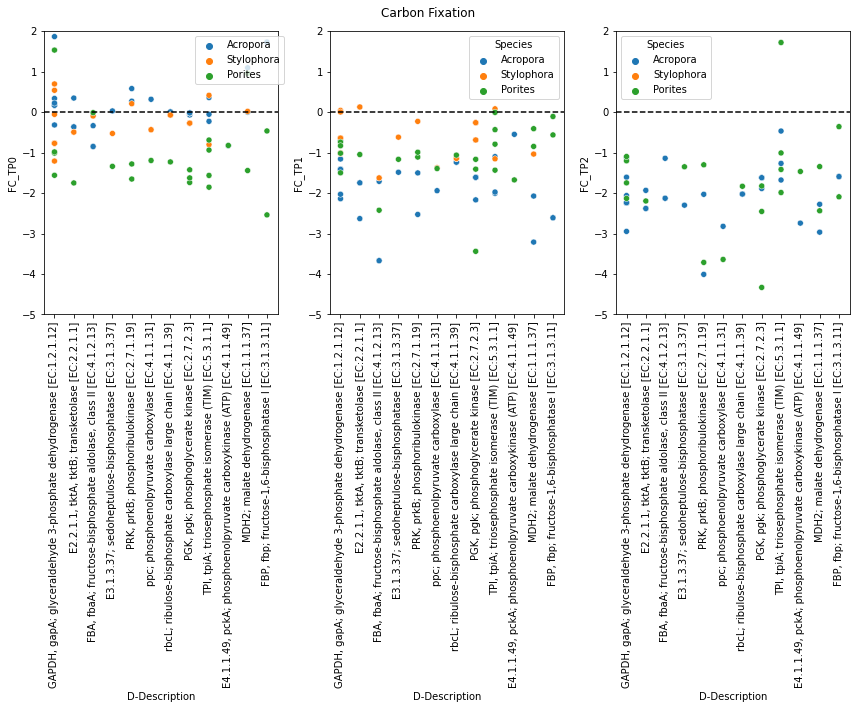

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace 'NA' with NaN
concatenated_df.replace('NA', np.nan, inplace=True)

# Create figure
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Carbon Fixation", fontsize=12)

# Create subplots
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

# Create scatter plot for FC_TP0
scatter_plot1 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP0', hue='Species', ax=ax1)
scatter_plot1.set_xticklabels(scatter_plot1.get_xticklabels(), rotation=90)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_ylim(-5, 2)  # Set y-axis limit

# Create scatter plot for FC_TP1
scatter_plot2 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP1', hue='Species', ax=ax2)
scatter_plot2.set_xticklabels(scatter_plot2.get_xticklabels(), rotation=90)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_ylim(-5, 2)  # Set y-axis limit

# Create scatter plot for FC_TP2
scatter_plot3 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP2', hue='Species', ax=ax3)
scatter_plot3.set_xticklabels(scatter_plot3.get_xticklabels(), rotation=90)
ax3.axhline(y=0, color='black', linestyle='--')
ax3.set_ylim(-5, 2)  # Set y-axis limit

# Move legend to the right outside
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

# Show plot
plt.tight_layout()

plt.savefig('Carbon_fixation_plot.pdf')
plt.show()


# Repeat for Photosynthesis

In [52]:
pathway = 'Photosynthesis'
Acr.dropna(subset=['C-Description'], inplace=True)
photosynthesis_Acr = Acr[Acr['C-Description'].str.contains(pathway, case=False)]
# stylo
Sty.dropna(subset=['C-Description'], inplace=True)
photosynthesis_Sty = Sty[Sty['C-Description'].str.contains(pathway, case=False)]
#Porites
Por.dropna(subset=['C-Description'], inplace=True)
photosynthesis_Por = Por[Por['C-Description'].str.contains(pathway, case=False)]


In [54]:
photosynthesis_Acr['Species'] = 'Acropora'
photosynthesis_Sty['Species'] = 'Stylophora'
photosynthesis_Por['Species'] = 'Porites'
dfs = [photosynthesis_Acr, photosynthesis_Sty, photosynthesis_Por ]
concatenated_df = pd.concat(dfs, join='outer', ignore_index=True)

# Fill missing values with NA
concatenated_df.fillna('NA', inplace=True)
concatenated_df.replace('NA', np.nan, inplace=True)
concatenated_df

/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/3736625453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photosynthesis_Acr['Species'] = 'Acropora'
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/3736625453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photosynthesis_Sty['Species'] = 'Stylophora'
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/3736625453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Unnamed: 0.1,Protein_ID,FC_TP0,pval_TP0,ADJPVALUE_TP0,FC_TP1,pval_TP1,ADJPVALUE_TP1,FC_TP2,pval_TP2,...,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description,Species
0,6,Cladocopium_sp_clade_C3_Plastid_v1___psbD,-0.557861,0.352492,0.989000,-1.727774,0.053449,0.160902,-1.432751,0.114908,...,191943,K02706,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbD; photosystem II P680 reaction center D2 p...,Acropora
1,8,Cladocopium_sp_clade_C3_Plastid_v1___psbC,-0.747412,0.271614,0.989000,-1.625680,0.029260,0.154876,-1.663488,0.050157,...,191941,K02705,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbC; photosystem II CP43 chlorophyll apoprotein,Acropora
2,36,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.133952,0.694225,0.989000,-1.793251,0.041765,0.160288,-2.259618,0.014111,...,67936,K02634,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petA; apocytochrome f,Acropora
3,38,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.133952,0.694225,0.989000,-1.793251,0.041765,0.160288,-2.259618,0.014111,...,78327,K02634,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petA; apocytochrome f,Acropora
4,40,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.133952,0.694225,0.989000,-1.793251,0.041765,0.160288,-2.259618,0.014111,...,67839,K02634,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petA; apocytochrome f,Acropora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,610,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.818333,0.324773,0.458806,-0.759183,0.101623,0.214999,-2.410428,0.132185,...,67232,K02641,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petH; ferredoxin--NADP+ reductase [EC:1.18.1.2],Porites
118,895,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.943210,0.163225,0.294069,0.333779,0.909067,0.936423,-1.244133,0.093968,...,54105,K02692,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psaD; photosystem I subunit II,Porites
119,900,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.154783,0.062759,0.184951,-0.584905,0.474656,0.586728,-0.138532,0.657548,...,92941,K02641,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petH; ferredoxin--NADP+ reductase [EC:1.18.1.2],Porites
120,1068,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.272188,0.382359,0.514048,1.745188,0.569007,0.675222,-0.137202,0.871355,...,79193,K02691,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psaC; photosystem I subunit VII,Porites


/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2893039096.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot1.set_xticklabels(scatter_plot1.get_xticklabels(), rotation=90)
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2893039096.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot2.set_xticklabels(scatter_plot2.get_xticklabels(), rotation=90)
/var/folders/s1/31gd39_55zgcmsjz0xx9m46c0000gn/T/ipykernel_21462/2893039096.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot3.set_xticklabels(scatter_plot3.get_xticklabels(), rotation=90)


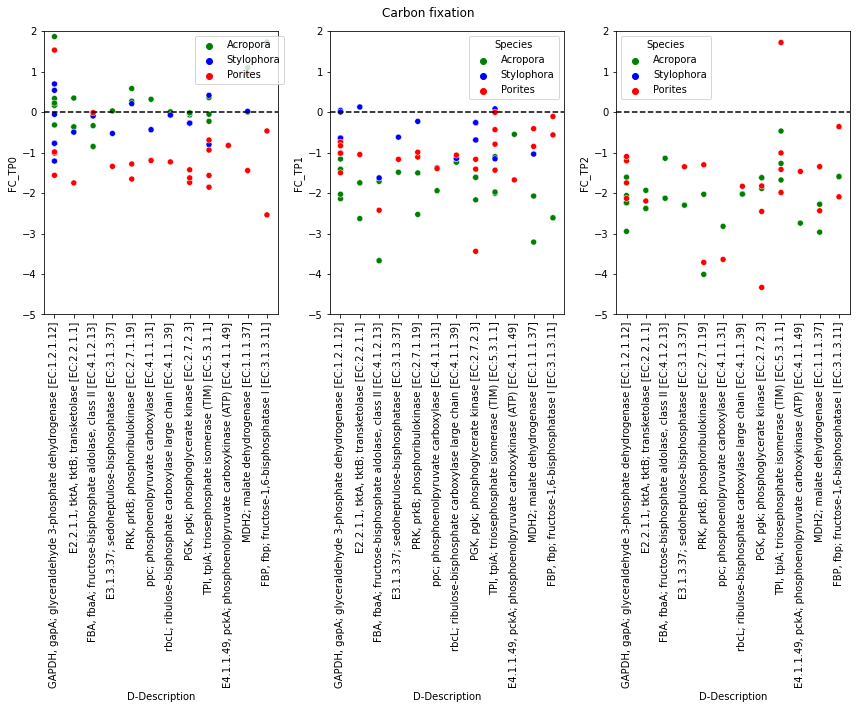

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace 'NA' with NaN
concatenated_df.replace('NA', np.nan, inplace=True)

# Define custom colors for each species
custom_palette = {'Acropora': 'green', 'Stylophora': 'blue', 'Porites': 'red'}

# Create figure
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Carbon fixation", fontsize=12)

# Create subplots
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

# Create scatter plot for FC_TP0
scatter_plot1 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP0', hue='Species', ax=ax1, palette=custom_palette)
scatter_plot1.set_xticklabels(scatter_plot1.get_xticklabels(), rotation=90)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_ylim(-5, 2)  # Set y-axis limit

# Create scatter plot for FC_TP1
scatter_plot2 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP1', hue='Species', ax=ax2, palette=custom_palette)
scatter_plot2.set_xticklabels(scatter_plot2.get_xticklabels(), rotation=90)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_ylim(-5, 2)  # Set y-axis limit

# Create scatter plot for FC_TP2
scatter_plot3 = sns.scatterplot(data=concatenated_df, x='D-Description', y='FC_TP2', hue='Species', ax=ax3, palette=custom_palette)
scatter_plot3.set_xticklabels(scatter_plot3.get_xticklabels(), rotation=90)
ax3.axhline(y=0, color='black', linestyle='--')
ax3.set_ylim(-5, 2)  # Set y-axis limit

# Move legend to the right outside
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper right')

# Adjust layout to prevent cropping
plt.tight_layout()

# Save the figure
plt.savefig('Carbon_fixation.pdf')

# Show plot
plt.show()


# To DO 
1. Check Photosynthesis
2. Symbiont volcano plot 


In [93]:
tmp = pd.merge(photosynthesis_Acr, photosynthesis_Sty, on='Protein_ID')
photosynthesis_merged = pd.merge(tmp, photosynthesis_Por, on='Protein_ID')
photosynthesis_merged.to_csv('photosynthesis_merged.csv')

In [92]:
photosynthesis_merged

,Unnamed: 0.1_x,Protein_ID,FC_TP0_x,pval_TP0_x,ADJPVALUE_TP0_x,FC_TP1_x,pval_TP1_x,ADJPVALUE_TP1_x,FC_TP2_x,pval_TP2_x,...,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description,Species
0,6,Cladocopium_sp_clade_C3_Plastid_v1___psbD,-0.557861,0.352492,0.989,-1.727774,0.053449,0.160902,-1.432751,0.114908,...,191943,K02706,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbD; photosystem II P680 reaction center D2 p...,Porites
1,8,Cladocopium_sp_clade_C3_Plastid_v1___psbC,-0.747412,0.271614,0.989,-1.625680,0.029260,0.154876,-1.663488,0.050157,...,191941,K02705,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbC; photosystem II CP43 chlorophyll apoprotein,Porites
2,42,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.133952,0.694225,0.989,-1.793251,0.041765,0.160288,-2.259618,0.014111,...,78325,K02634,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petA; apocytochrome f,Porites
3,46,Cladocopium_sp_clade_C3_Plastid_v1___psbB,-0.277346,0.460767,0.989,-2.071205,0.000404,0.134339,-1.201114,0.084758,...,191939,K02704,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbB; photosystem II CP47 chlorophyll apoprotein,Porites
4,50,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.859486,0.316652,0.989,-2.008960,0.023092,0.146404,-4.010471,0.007510,...,82765,K02636,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petC; cytochrome b6-f complex iron-sulfur subu...,Porites
5,53,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.161689,0.509204,0.989,-1.423669,0.088454,0.170995,-2.198797,0.013872,...,75366,K02719,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbU; photosystem II PsbU protein,Porites
6,74,Cladocopium_sp_clade_C3_Plastid_v1___psbA,-0.629772,0.428542,0.989,-3.692138,0.010540,0.146404,-2.778398,0.058605,...,191937,K02703,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbA; photosystem II P680 reaction center D1 p...,Porites
7,181,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.270931,0.433007,0.989,-1.413592,0.086846,0.168866,-1.427885,0.062082,...,67952,K02641,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petH; ferredoxin--NADP+ reductase [EC:1.18.1.2],Porites
8,199,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.142996,0.724187,0.989,-2.205321,0.022587,0.146404,-4.415447,0.064266,...,105375,K02641,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],petH; ferredoxin--NADP+ reductase [EC:1.18.1.2],Porites
9,324,Cladocopium_goreaui_v3___evm.model.scf71800003...,-0.118162,0.543952,0.989,-1.344039,0.099739,0.184689,-2.217397,0.027539,...,105478,K02716,9100.0,Metabolism,9102.0,Energy metabolism,195.0,Photosynthesis [PATH:ko00195],psbO; photosystem II oxygen-evolving enhancer ...,Porites


# Volcano Plots

In [87]:
# load in the datasets
Mcap = pd.read_csv('/Users/shrinivas/Desktop/On-going Papers/Meta_proteome_iv/Supplemental Tables/Supplemental_Table_1_Mcap_Symbiont.csv')
Acr = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Acr_complete_symb.csv')
Sty = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Sty_complete_symb.csv')
Por = pd.read_csv('/Users/shrinivas/Desktop/Redone_Endosymbiont_Proteome/Results/Por_complete_symb.csv')
Por

,Unnamed: 0.1,Protein_ID,FC_TP0,pval_TP0,ADJPVALUE_TP0,FC_TP1,pval_TP1,ADJPVALUE_TP1,FC_TP2,pval_TP2,ADJPVALUE_TP2,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description
0,0,Cladocopium_goreaui_v3___evm.model.scf71800003...,-4.936702,0.121752,0.249064,-2.264065,0.375961,0.497924,-4.177462,0.127771,0.232074,68890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cladocopium_goreaui_v3___evm.model.scf71800003...,-1.739319,0.066856,0.193253,-3.440574,0.277427,0.402134,-4.333082,0.101769,0.203160,75491,K00927,9100.0,Metabolism,9101.0,Carbohydrate metabolism,10.0,Glycolysis / Gluconeogenesis [PATH:ko00010],"PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]"
2,5,Cladocopium_goreaui_v3___evm.model.scf71800003...,-3.773546,0.001030,0.079278,-1.752197,0.153749,0.280613,-3.533053,0.094035,0.196457,90307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Cladocopium_goreaui_v3___evm.model.scf71800003...,-2.853664,0.115567,0.243697,-2.593814,0.085274,0.195098,-2.233904,0.209721,0.314228,90306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Cladocopium_goreaui_v3___evm.model.scf71800003...,-4.838156,0.004169,0.095585,-1.758114,0.261587,0.382915,-3.316350,0.206177,0.312071,50365,K05349,9100.0,Metabolism,9101.0,Carbohydrate metabolism,500.0,Starch and sucrose metabolism [PATH:ko00500],bglX; beta-glucosidase [EC:3.2.1.21]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1123,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.154967,0.459721,0.587862,-1.428230,0.249646,0.375312,2.410308,0.163621,0.275800,106250,K09490,9120.0,Genetic Information Processing,9123.0,"Folding, sorting and degradation",3060.0,Protein export [PATH:ko03060],"HSPA5, BIP; heat shock 70kDa protein 5"
441,1130,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.328828,0.781548,0.842104,3.298619,0.120624,0.243989,0.530734,0.261248,0.370241,54661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,1131,Cladocopium_goreaui_v3___evm.model.scf71800003...,2.684079,0.024608,0.144087,2.956807,0.250981,0.376049,1.802416,0.269722,0.378632,58506,K00688,9100.0,Metabolism,9101.0,Carbohydrate metabolism,500.0,Starch and sucrose metabolism [PATH:ko00500],"PYG, glgP; glycogen phosphorylase [EC:2.4.1.1]"
443,1137,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.323778,0.840018,0.885648,3.962166,0.024893,0.125010,1.240515,0.448561,0.535146,82675,K02926,9120.0,Genetic Information Processing,9122.0,Translation,3010.0,Ribosome [PATH:ko03010],"RP-L4, MRPL4, rplD; large subunit ribosomal pr..."


In [88]:
def rename_columns(df):
    return df.rename(columns=lambda x: x.replace('TP', 'T'))

# Apply the function to the DataFrame
Por = rename_columns(Por)
Acr = rename_columns(Acr)
Sty = rename_columns(Sty)
Sty

,Unnamed: 0.1,Protein_ID,FC_T0,pval_T0,ADJPVALUE_T0,FC_T1,pval_T1,ADJPVALUE_T1,Unnamed: 0,KO,A-ID,A-Description,B-ID,B-Description,C-ID,C-Description,D-Description
0,0,Cladocopium_goreaui_v3___evm.model.scf71800003...,-3.930681,0.002341,0.085876,-2.905528,0.120432,0.475572,107721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cladocopium_goreaui_v3___evm.model.scf71800003...,-3.930681,0.002341,0.085876,-2.905528,0.120432,0.475572,94516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Cladocopium_goreaui_v3___evm.model.scf71800003...,-2.293191,0.012648,0.383911,-3.439754,0.116936,0.472862,67694,K04097,9100.0,Metabolism,9103.0,Lipid metabolism,590.0,Arachidonic acid metabolism [PATH:ko00590],HPGDS; prostaglandin-H2 D-isomerase / glutathi...
3,7,Cladocopium_goreaui_v3___evm.model.scf71800003...,-2.468993,0.038648,0.573139,-3.034883,0.000004,0.002649,71179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Cladocopium_goreaui_v3___evm.model.scf71800003...,-2.519431,0.017864,0.383911,-1.721067,0.005319,0.221491,63390,K02372,9100.0,Metabolism,9103.0,Lipid metabolism,61.0,Fatty acid biosynthesis [PATH:ko00061],fabZ; 3-hydroxyacyl-[acyl-carrier-protein] deh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2748,Cladocopium_goreaui_v3___evm.model.scf71800003...,2.321928,0.135068,0.910994,-0.845364,0.825948,0.879886,90306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,2749,Cladocopium_goreaui_v3___evm.model.scf71800003...,1.850827,0.072501,0.692375,0.869607,0.403243,0.682185,93981,K01225,9100.0,Metabolism,9101.0,Carbohydrate metabolism,500.0,Starch and sucrose metabolism [PATH:ko00500],"CBH1; cellulose 1,4-beta-cellobiosidase [EC:3...."
693,2750,Cladocopium_goreaui_v3___evm.model.scf71800003...,1.841120,0.135930,0.910994,0.648612,0.182325,0.486288,96644,K04077,9120.0,Genetic Information Processing,9123.0,"Folding, sorting and degradation",3018.0,RNA degradation [PATH:ko03018],"groEL, HSPD1; chaperonin GroEL"
694,2759,Cladocopium_goreaui_v3___evm.model.scf71800003...,0.142797,0.439161,0.998542,2.058493,0.060226,0.322904,50345,K01802,9190.0,Not Included in Pathway or Brite,9191.0,Unclassified: metabolism,99980.0,Enzymes with EC numbers,E5.2.1.8; peptidylprolyl isomerase [EC:5.2.1.8]


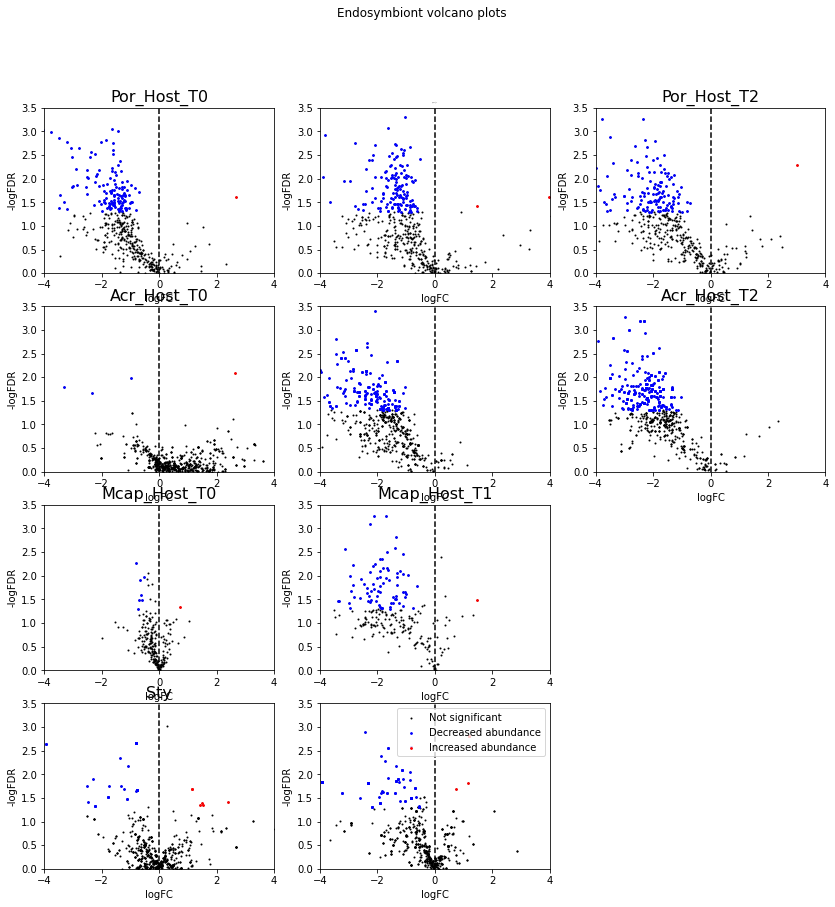

In [91]:
# Host at T0
fig = plt.figure(figsize=(14,14))
fig.suptitle("Endosymbiont volcano plots", fontsize=12)

# Host at T0
ax = plt.subplot(4, 3, 1)
plt.scatter(x=Por['FC_T0'],y=Por['pval_T0'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")


down = Por[(Por['FC_T0']<=-0.5)&(Por['pval_T0']<=0.05)]
up = Por[(Por['FC_T0']>=0.5)&(Por['pval_T0']<=0.05)]

plt.scatter(x=down['FC_T0'],y=down['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T0'],y=up['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Por_Host_T0', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)


# T1
ax = plt.subplot(4, 3, 2)
plt.scatter(x=Por['FC_T1'],y=Por['pval_T1'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")
# highlight down- or up- regulated genes
down = Por[(Por['FC_T1']<=-0.5)& (Por['pval_T1']<=0.05)]
up = Por[(Por['FC_T1']>=0.5)& (Por['pval_T1']<=0.05)]

plt.scatter(x=down['FC_T1'],y=down['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T1'],y=up['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
ax.set_ylim(0, 3.5)
ax.set_xlim(-4, 4)

plt.title('Por_Host_T1', fontsize=1)

# Host at T2
ax = plt.subplot(4, 3, 3)
plt.scatter(x=Por['FC_T2'],y=Por['pval_T2'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")

# highlight down- or up- regulated genes
down = Por[(Por['FC_T2']<=-0.5)& (Por['pval_T2']<=0.05)]
up = Por[(Por['FC_T2']>=0.5) & (Por['pval_T2']<=0.05)]

plt.scatter(x=down['FC_T2'],y=down['pval_T2'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T2'],y=up['pval_T2'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Por_Host_T2', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)



########### Get Acropora####################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################


# Host at T0
ax = plt.subplot(4, 3, 4)
plt.scatter(x=Acr['FC_T0'],y=Acr['pval_T0'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")


down = Acr[(Acr['FC_T0']<=-0.5)&(Acr['pval_T0']<=0.05)]
up = Acr[(Acr['FC_T0']>=0.5)&(Acr['pval_T0']<=0.05)]

plt.scatter(x=down['FC_T0'],y=down['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T0'],y=up['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Acr_Host_T0', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)

# T1
ax = plt.subplot(4, 3, 5)
plt.scatter(x=Acr['FC_T1'],y=Acr['pval_T1'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")
# highlight down- or up- regulated genes
down = Acr[(Acr['FC_T1']<=-0.5)& (Acr['pval_T1']<=0.05)]
up = Acr[(Acr['FC_T1']>=0.5)& (Acr['pval_T1']<=0.05)]

plt.scatter(x=down['FC_T1'],y=down['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T1'],y=up['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
ax.set_ylim(0, 3.5)
ax.set_xlim(-4, 4)

plt.title('Acr_Host_T1', fontsize=1)

# Host at T2
ax = plt.subplot(4, 3, 6)
plt.scatter(x=Acr['FC_T2'],y=Acr['pval_T2'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")

# highlight down- or up- regulated genes
down = Acr[(Acr['FC_T2']<=-0.5)& (Acr['pval_T2']<=0.05)]
up = Acr[(Acr['FC_T2']>=0.5) & (Acr['pval_T2']<=0.05)]

plt.scatter(x=down['FC_T2'],y=down['pval_T2'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T2'],y=up['pval_T2'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Acr_Host_T2', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)

################# Do Mcap##################

ax = plt.subplot(4, 3, 7)
plt.scatter(x=Mcap['log2FC_TP1'],y=Mcap['pvalue TP1'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")


down = Mcap[(Mcap['log2FC_TP1']<=-0.5)&(Mcap['pvalue TP1']<=0.05)]
up = Mcap[(Mcap['log2FC_TP1']>=0.5)&(Mcap['pvalue TP1']<=0.05)]

plt.scatter(x=down['log2FC_TP1'],y=down['pvalue TP1'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FC_TP1'],y=up['pvalue TP1'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Mcap_Host_T0', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)

##### TP3 for mcap

ax = plt.subplot(4, 3, 8)
plt.scatter(x=Mcap['log2FC_TP3'],y=Mcap['pvalue_TP3'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")


down = Mcap[(Mcap['log2FC_TP3']<=-0.5)&(Mcap['pvalue_TP3']<=0.05)]
up = Mcap[(Mcap['log2FC_TP3']>=0.5)&(Mcap['pvalue_TP3']<=0.05)]

plt.scatter(x=down['log2FC_TP3'],y=down['pvalue_TP3'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FC_TP3'],y=up['pvalue_TP3'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Mcap_Host_T1', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)



########### Get Stylo####################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
# Host at T0
ax = plt.subplot(4, 3, 10)
plt.scatter(x=Sty['FC_T0'],y=Sty['pval_T0'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")


down = Sty[(Sty['FC_T0']<=-0.5)&(Sty['pval_T0']<=0.05)]
up = Sty[(Sty['FC_T0']>=0.5)&(Sty['pval_T0']<=0.05)]

plt.scatter(x=down['FC_T0'],y=down['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['FC_T0'],y=up['pval_T0'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.title('Sty', fontsize=16)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)

# T1
ax = plt.subplot(4, 3, 11)
plt.scatter(x=Sty['FC_T1'],y=Sty['pval_T1'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color = "black")
# highlight down- or up- regulated genes
down = Sty[(Sty['FC_T1']<=-0.5)& (Sty['pval_T1']<=0.05)]
up = Sty[(Sty['FC_T1']>=0.5)& (Sty['pval_T1']<=0.05)]

plt.scatter(x=down['FC_T1'],y=down['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Decreased abundance",color="blue")
plt.scatter(x=up['FC_T1'],y=up['pval_T1'].apply(lambda x:-np.log10(x)),s=3,label="Increased abundance",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(0,color="black", linestyle = "--")
plt.legend()
ax.set_ylim(0, 3.5)
ax.set_xlim(-4, 4)
plt.savefig('Endosymbiont_plots_redone.pdf')

# Stacked Bar Chart 
Note this script is for R

In [ ]:
df <- read.csv('/Users/Shrini/Desktop/Redone_Endosymbiont_Proteome/Stacked_bar_plot/data_enodsymbiont.csv')


df_TP0 <- df[, c('Species', 'Pathway', 'Total.Proteins.detected', 'TP0_Increased.abundance', 'TP0_Decreased.abundance')]
df_TP1 <- df[, c('Species', 'Pathway', 'Total.Proteins.detected', 'TP1_Increased.abundance', 'TP1_Decreased.abundance')]
df_TP2 <- df[, c('Species', 'Pathway', 'Total.Proteins.detected', 'TP2_Increased.abundance', 'TP2_Decreased.abundance')]

df_TP0$TP0_Decreased.abundance <- -df_TP0$TP0_Decreased.abundance
df_TP1$TP1_Decreased.abundance <- -df_TP1$TP1_Decreased.abundance
df_TP2$TP2_Decreased.abundance <- -df_TP2$TP2_Decreased.abundance

# Plot for TP0
plot_TP0 <- ggplot(df_TP0, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP0_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP0_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP0",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "none") +  # Remove legend for individual plots
  ylim(-200, 100)  # Set y-axis limits

# Plot for TP1
plot_TP1 <- ggplot(df_TP1, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP1_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP1_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP1",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "none") +  # Remove legend for individual plots
  ylim(-200, 100)  # Set y-axis limits

# Plot for TP2
plot_TP2 <- ggplot(df_TP2, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP2_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP2_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP2",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "none") +  # Remove legend for individual plots
  ylim(-200, 100)  # Set y-axis limits

# Arrange the plots horizontally
combined_plot <- grid.arrange(plot_TP0, plot_TP1, plot_TP2, ncol = 3)

# Add a common legend
combined_plot


```

```{r}
# Reorder levels of "Species" variable
df_TP0$Species <- factor(df_TP0$Species, levels = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))
df_TP1$Species <- factor(df_TP1$Species, levels = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))
df_TP2$Species <- factor(df_TP2$Species, levels = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))

# Plot for TP0
plot_TP0 <- ggplot(df_TP0, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP0_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP0_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP0",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "none") +  # Remove legend for individual plots
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Plot for TP1
plot_TP1 <- ggplot(df_TP1, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP1_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP1_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP1",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "none") +  # Remove legend for individual plots
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Plot for TP2
plot_TP2 <- ggplot(df_TP2, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP2_Increased.abundance), position = "stack", stat = "identity") +
  geom_bar(aes(y = TP2_Decreased.abundance), position = "stack", stat = "identity") +
  labs(title = "Protein Distribution TP2",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "topright") +  # Remove legend for individual plots
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Arrange the plots horizontally
combined_plot <- grid.arrange(plot_TP0, plot_TP1, plot_TP2, ncol = 3)
combined_plot
# Add a common legend
#combined_plot + guides(fill = guide_legend(title = "Pathway", position = "right"))  # Include legend from one of the plots


```

```{r}
# Plot for TP0
plot_TP0 <- ggplot(df_TP0, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP0_Increased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  geom_bar(aes(y = TP0_Decreased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  labs(title = "Protein Distribution TP0",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.line = element_line(color = "black", size = 0.5),  # Solid x and y axes
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank()) +  # Remove minor grid lines
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "topright") +  # Adjust legend position
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Plot for TP1
plot_TP1 <- ggplot(df_TP1, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP1_Increased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  geom_bar(aes(y = TP1_Decreased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  labs(title = "Protein Distribution TP1",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.line = element_line(color = "black", size = 0.5),  # Solid x and y axes
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank()) +  # Remove minor grid lines
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "topright") +  # Adjust legend position
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Plot for TP2
plot_TP2 <- ggplot(df_TP2, aes(fill = Pathway, x = Species)) +
  geom_bar(aes(y = TP2_Increased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  geom_bar(aes(y = TP2_Decreased.abundance), position = position_stack(), stat = "identity", width = 0.5) +
  labs(title = "Protein Distribution TP2",
       x = "Species",
       y = "Number of proteins with |FC| > 0.5") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "lightcoral", "lightgreen", "lightyellow", "lightsalmon", "lightcyan")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.line = element_line(color = "black", size = 0.5),  # Solid x and y axes
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank()) +  # Remove minor grid lines
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 1) +
  theme(legend.position = "topright") +  # Adjust legend position
  ylim(-200, 100) +  # Set y-axis limits
  scale_x_discrete(limits = c("Montipora capitata", "Acropora hyacinthus", "Porites lobata (Host)", "Stylophora pistilliata"))  # Set x-axis order

# Arrange the plots horizontally
combined_plot <- grid.arrange(plot_TP0, plot_TP1, plot_TP2, ncol = 3)
ggsave("combined_plot.pdf", combined_plot, width = 12, height = 6)

# Add a common legend